## a Simple Forward Neural Network
loss function = Means square loss, 
activation function = sigmoid for all layers

In [14]:
import numpy as np
import pandas as pd

class ForwardNeuralNetwork:
    def __init__(self, inputsize , hiddenlayer , outputsize=1, learning_rate = 0.01, epochs = 1000):
        self.input_size = inputsize
        self.hidden_size = hiddenlayer # List of integers, each representing the number of neurons in that hidden layer
        self.output_size = outputsize
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = self.initialize_weights()
        self.training_loss = []
        
    def initialize_weights(self):
        np.random.seed(1)
        weights = []
        layer_size = [self.input_size] + self.hidden_size + [self.output_size]
        for i in range(len(layer_size)-1):
            weights.append({
                'W' : np.random.rand(layer_size[i], layer_size[i+1])-0.5,
                'b' : np.random.rand(layer_size[i+1])-0.5
            })
        return weights
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * ( 1 - x)
    
    def forward_pass(self,x):
        activation = [x]
        z_values = []
        for layers in self.weights:    
            z = np.dot(activation[-1], layers['W']) + layers['b']  # z = X@W + b
            A = self.sigmoid(z)
            z_values.append(z)
            activation.append(A)
        return z_values, activation
    
    def backward_pass(self, X, y, z_values, activation):
        m = y.shape[0]
        y = y.reshape(-1,1)
        
        dA = activation[-1] - y  #  dL/dy_hat = 2/m * (y_hat - y_true) 
        for i in reversed(range(len(self.weights))):
            dZ = dA * self.sigmoid_derivative(activation[i+1])   # dL/dy_hat * dy_hat/dz
            dW = np.dot(activation[i].T, dZ)/m  #  (dL/dy_hat * dy_hat/dz)* dz/dw = (dL/dy_hat * dy_hat/dz)* a  , z2 = W@a + b
            db = np.sum(dZ , axis =0 )/m
            if i > 0:
                dA = np.dot(dZ , self.weights[i]['W'].T) # (dL/dy_hat * dy_hat/dz)* dz/da = (dL/dy_hat * dy_hat/dz) @ W
            self.weights[i]['W'] -= self.learning_rate*dW
            self.weights[i]['b'] -= self.learning_rate*db
        
            
    def fit(self, X_train, y_train):
        for i in range(self.epochs):
            z_values, activation = self.forward_pass(X_train)
            self.backward_pass(X_train, y_train, z_values, activation)
            
            loss = np.mean((activation[-1] - y_train.reshape(-1,1))**2) # loss = (y_hat - y_true)^2 : Mean square error loss
            self.training_loss.append(loss)
            
            if (i+1) % 100 == 0:
                print(f'Epoch {i+1}/{self.epochs}, Loss: {loss}')

            
    def predict(self, X):
        _,activation = self.forward_pass(X)
        return (activation[-1]>0.5).astype(int)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#  load dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[: , 3:-1].values
y = dataset.iloc[:, -1].values

# encode the categorial data
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
# One Hot Encoding the "Geography" column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=0)

#feature scaling , this Speeding Up Convergence
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #scales the training data based on the calculated mean and standard deviation from the training set
X_test = sc.transform(X_test)   #applies the same scaling to the test data using the parameters from the training set.


In [16]:
# train the model
hidden_layer = [10,10]
epochs = 1000
learning_rate =0.01
nn = ForwardNeuralNetwork(inputsize=X_train.shape[1], hiddenlayer=hidden_layer, learning_rate=learning_rate , epochs=epochs)
nn.fit(X_train, y_train)
# evaluation
y_pred = nn.predict(X_test)
accuracy = np.mean(y_pred == y_test.reshape(-1,1))
print(f'Accuracy is {accuracy *100:.2f}%')

Epoch 100/1000, Loss: 0.22063943617151416
Epoch 200/1000, Loss: 0.19889381505177062
Epoch 300/1000, Loss: 0.18608514068432253
Epoch 400/1000, Loss: 0.1783056561510579
Epoch 500/1000, Loss: 0.17340569865950714
Epoch 600/1000, Loss: 0.17021096732296895
Epoch 700/1000, Loss: 0.16806358905136182
Epoch 800/1000, Loss: 0.16658193829461715
Epoch 900/1000, Loss: 0.16553657726106072
Epoch 1000/1000, Loss: 0.16478487000803665
Accuracy is 79.75%


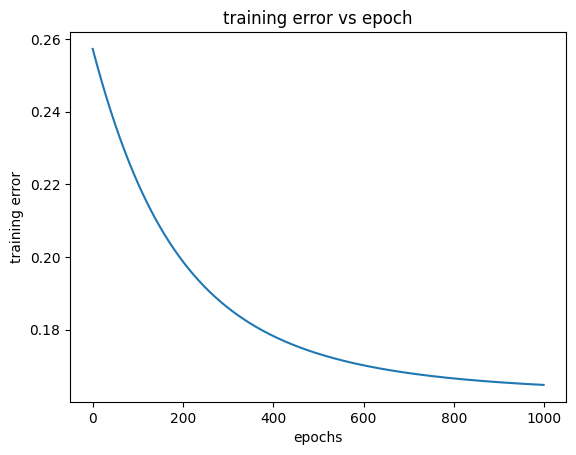

In [17]:
import matplotlib.pyplot as plt
# plot the errors over epochs
plt.plot(nn.training_loss)
plt.title('training error vs epoch')
plt.xlabel('epochs')
plt.ylabel('training error')
plt.show()